In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
import seaborn as sns
from scipy import stats

In [91]:
df = pd.read_csv("../data/processed_data.csv")

In [92]:
df_numeric_all = df.drop(['Unnamed: 0', 'Occupation', 'Blood Pressure','Person ID'],axis=1)
df_numeric = df.drop(['Unnamed: 0', 'Occupation', 'Blood Pressure','Person ID','Daily Steps','Physical Activity Level'], axis=1)


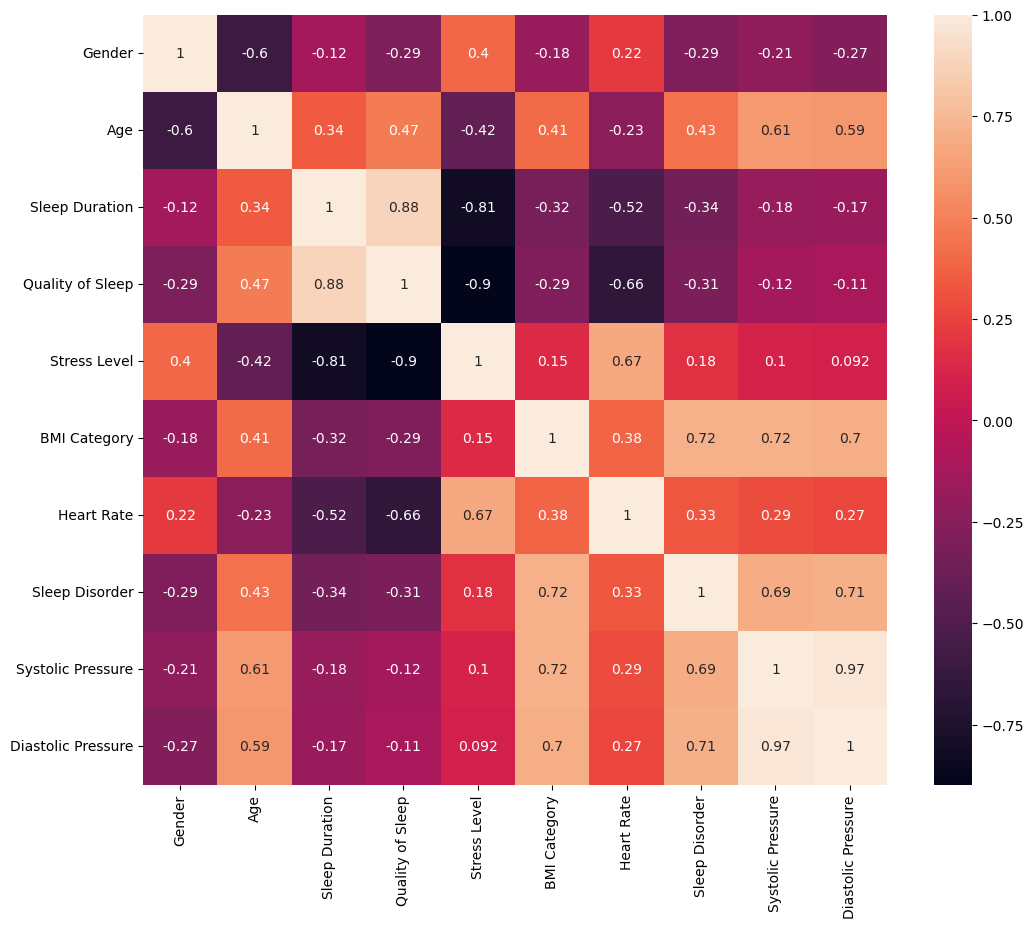

In [93]:
df_numeric_normalized=df_numeric/df_numeric.max()
corr=df_numeric_normalized.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,annot=True)
plt.show()


In [94]:
#Stress level based upon Sleep duration and quality of sleep
X=df_numeric.loc[:,['Stress Level','Sleep Duration','Heart Rate']].to_numpy()
y=df_numeric.loc[:,['Quality of Sleep']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(299, 3)
(75, 3)
(299, 1)
(75, 1)


In [95]:
#===============================================================================
# ALGORITMO: K-Nearest-Neighbors
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train.ravel()) #Si no se usara numpy habría que usar .values previo a ravel
y_predictor=knn.predict(X_test)
print('Comparación de la predicción con la especie observada')
print('Predicción        = ', y_predictor)
print('Especie observada = ', y_test.ravel())
print('Puntuación (score) de la clasificación ', knn.score(X_test, y_test))

Comparación de la predicción con la especie observada
Predicción        =  [6 9 6 8 8 7 9 8 6 8 6 6 7 7 6 8 9 9 6 8 4 6 6 6 8 7 7 5 6 6 8 8 8 8 8 9 7
 9 6 6 7 8 8 7 9 8 6 9 8 9 6 6 8 6 7 7 9 7 9 7 9 8 7 8 4 6 8 9 7 7 8 7 6 8
 9]
Especie observada =  [6 9 6 8 8 8 9 8 6 8 6 5 7 7 6 8 9 9 7 8 7 5 6 6 8 7 7 4 6 6 8 8 8 8 8 9 7
 9 6 6 8 8 8 7 9 8 6 9 8 9 6 6 8 6 7 7 9 7 9 7 9 8 7 8 4 5 8 9 7 8 8 7 6 8
 9]
Puntuación (score) de la clasificación  0.88


In [96]:
#===============================================================================
# ALGORITMO: Support Vector Classification version lineal.
svm=SVC(kernel='linear')
svm.fit(X_train,y_train.ravel())
y_predictor=svm.predict(X_test)
print('Comparación de la predicción con la especie observada')
print('Predicción        = ', y_predictor)
print('Especie observada = ', y_test.ravel())
print('Puntuación (score) de la clasificación ', svm.score(X_test, y_test))

Comparación de la predicción con la especie observada
Predicción        =  [6 9 6 8 7 8 9 7 6 7 6 6 7 7 6 7 9 9 7 7 7 6 6 6 8 7 7 4 6 6 7 8 8 8 8 9 7
 9 6 6 7 7 8 7 9 7 6 9 8 9 6 6 8 6 7 7 9 7 9 7 9 7 7 8 4 6 8 9 7 8 8 7 6 8
 9]
Especie observada =  [6 9 6 8 8 8 9 8 6 8 6 5 7 7 6 8 9 9 7 8 7 5 6 6 8 7 7 4 6 6 8 8 8 8 8 9 7
 9 6 6 8 8 8 7 9 8 6 9 8 9 6 6 8 6 7 7 9 7 9 7 9 8 7 8 4 5 8 9 7 8 8 7 6 8
 9]
Puntuación (score) de la clasificación  0.8266666666666667


In [97]:
#===============================================================================
# ALGORITMO: Decision Tree Classifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train.ravel())
y_predictor=tree.predict(X_test)
print('Comparación de la predicción con la especie observada')
print('Predicción        = ', y_predictor)
print('Especie observada = ', y_test.ravel())
print('Puntuación (score) de la clasificación ', tree.score(X_test, y_test))

Comparación de la predicción con la especie observada
Predicción        =  [6 9 6 8 8 8 9 8 6 8 6 5 7 7 6 8 9 9 7 8 7 5 6 6 8 7 7 4 6 6 8 8 8 8 8 9 7
 9 6 6 8 8 8 7 9 8 6 9 8 9 6 6 8 6 7 7 9 7 9 7 9 7 7 8 4 5 8 9 7 8 8 7 6 8
 9]
Especie observada =  [6 9 6 8 8 8 9 8 6 8 6 5 7 7 6 8 9 9 7 8 7 5 6 6 8 7 7 4 6 6 8 8 8 8 8 9 7
 9 6 6 8 8 8 7 9 8 6 9 8 9 6 6 8 6 7 7 9 7 9 7 9 8 7 8 4 5 8 9 7 8 8 7 6 8
 9]
Puntuación (score) de la clasificación  0.9866666666666667


In [98]:
#===============================================================================
# ALGORITMO: Multi-layer Perceptor classifier
neuralnet = MLPClassifier()#
neuralnet.fit(X_train,y_train.ravel()) # Entrenamos el algoritmo
#===============================================================================
# PREDICCIÓN, PRUEBA Y SCORE
y_predictor = neuralnet.predict(X_test)
print('Comparación de la predicción con la especie observada')
print('Predicción        = ', y_predictor)
print('Especie observada = ', y_test.ravel())
print('Puntuación (score) de la clasificación ', neuralnet.score(X_test, y_test))

Comparación de la predicción con la especie observada
Predicción        =  [6 9 6 8 8 8 9 8 6 8 6 6 8 8 6 8 9 9 7 8 7 6 6 6 8 8 8 6 6 6 8 8 8 8 8 9 8
 9 6 6 7 8 8 8 9 8 6 9 8 9 6 6 8 6 8 8 9 8 9 8 9 8 8 8 6 6 8 9 8 8 8 8 6 8
 9]
Especie observada =  [6 9 6 8 8 8 9 8 6 8 6 5 7 7 6 8 9 9 7 8 7 5 6 6 8 7 7 4 6 6 8 8 8 8 8 9 7
 9 6 6 8 8 8 7 9 8 6 9 8 9 6 6 8 6 7 7 9 7 9 7 9 8 7 8 4 5 8 9 7 8 8 7 6 8
 9]
Puntuación (score) de la clasificación  0.7466666666666667


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [99]:
#===============================================================================
# ALGORITMO: Gaussian process classification (GPC) based on Laplace approximation.
gauss= GaussianProcessClassifier()
gauss.fit(X_train,y_train.ravel())
y_predictor=gauss.predict(X_test)
print('Comparación de la predicción con la especie observada')
print('Predicción        = ', y_predictor)
print('Especie observada = ', y_test.ravel())
print('Puntuación (score) de la clasificación ', gauss.score(X_test, y_test))

Comparación de la predicción con la especie observada
Predicción        =  [6 9 6 8 8 7 9 8 6 8 6 5 7 7 6 8 9 9 6 8 7 5 6 6 8 7 7 4 6 6 8 8 8 8 8 9 7
 9 6 6 7 8 8 7 9 8 6 9 8 9 6 6 8 6 7 7 9 7 9 7 9 8 7 8 4 6 8 9 7 7 8 7 6 8
 9]
Especie observada =  [6 9 6 8 8 8 9 8 6 8 6 5 7 7 6 8 9 9 7 8 7 5 6 6 8 7 7 4 6 6 8 8 8 8 8 9 7
 9 6 6 8 8 8 7 9 8 6 9 8 9 6 6 8 6 7 7 9 7 9 7 9 8 7 8 4 5 8 9 7 8 8 7 6 8
 9]
Puntuación (score) de la clasificación  0.9333333333333333


In [100]:
#===============================================================================
# ALGORITMO: Gaussian Naive Bayer
gaussNB=GaussianNB()
gaussNB.fit(X_train,y_train.ravel())
y_predictor=gaussNB.predict(X_test)
print('Comparación de la predicción con la especie observada')
print('Predicción        = ', y_predictor)
print('Especie observada = ', y_test.ravel())
print('Puntuación (score) de la clasificación ', gaussNB.score(X_test, y_test))

Comparación de la predicción con la especie observada
Predicción        =  [6 9 6 8 8 8 9 8 6 8 6 5 7 7 6 8 9 9 7 8 7 5 6 6 8 7 7 4 5 6 8 8 8 8 8 9 7
 9 5 6 7 8 8 7 9 8 6 9 8 9 6 6 8 6 7 7 9 7 9 7 9 7 7 8 4 5 8 9 7 8 8 7 6 8
 9]
Especie observada =  [6 9 6 8 8 8 9 8 6 8 6 5 7 7 6 8 9 9 7 8 7 5 6 6 8 7 7 4 6 6 8 8 8 8 8 9 7
 9 6 6 8 8 8 7 9 8 6 9 8 9 6 6 8 6 7 7 9 7 9 7 9 8 7 8 4 5 8 9 7 8 8 7 6 8
 9]
Puntuación (score) de la clasificación  0.9466666666666667


/var/folders/p8/96d3g_wj42nfdr3ndh2m3b8m0000gn/T/ipykernel_25462/3636914479.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=315)


[Text(0, 0, 'Age'),
 Text(1, 0, 'Sleep Duration'),
 Text(2, 0, 'Heart Rate'),
 Text(3, 0, 'Systolic Pressure'),
 Text(4, 0, 'Diastolic Pressure')]

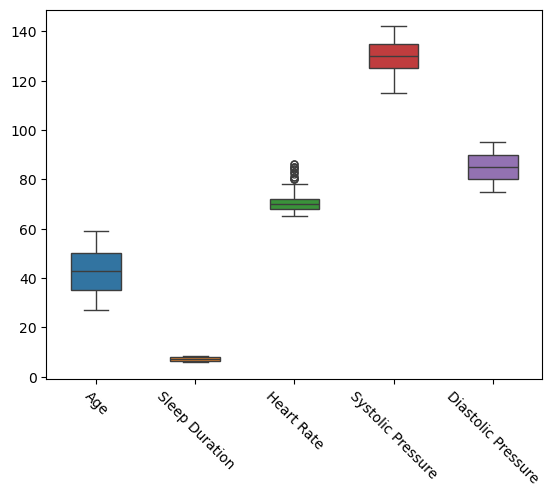

In [102]:
#=====================================================================
# DIAGRAMA DE CAJA Y BIGOTE CON SEABORN
df_boxplot = df_numeric_all[['Age', 'Sleep Duration', 'Heart Rate', 'Systolic Pressure', 'Diastolic Pressure']]
#Sleep Duration, age, heart rate, sistolic pressure, diastolic pressure
ax=sns.boxplot(data=df_boxplot,width=0.5,fliersize=5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=315)


ValueError: X has 2 features, but MLPClassifier is expecting 3 features as input.

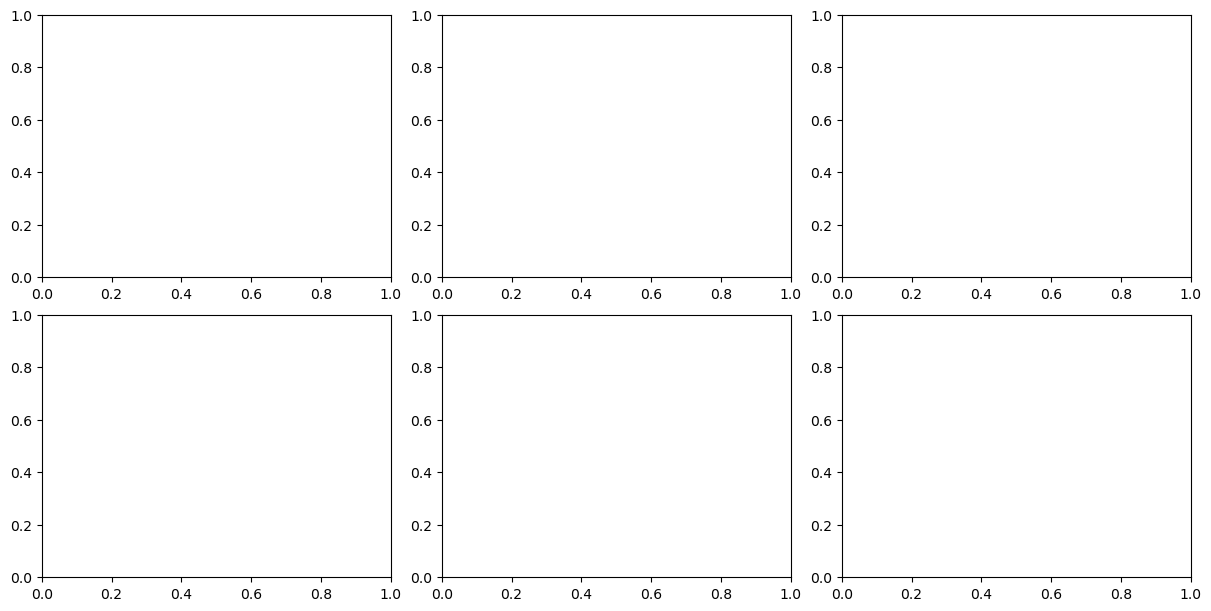

In [107]:
# FIGURA
# PARA QUE SE VEA BIEN HAY QUE DESNORMALIZAR
fig, axes = plt.subplots(2,3,figsize=(12, 6),layout="constrained")
X = X[:,0:3]
SL_min,SL_max = X[:,0].min() - .5, X[:,0].max() + .5
SW_min,SW_max = X[:,1].min() - .5, X[:,1].max() + .5
h = 0.2
SL, SW = np.meshgrid(np.arange(SL_min, SL_max, h), np.arange(SW_min,SW_max,h))
S = np.c_[SL.ravel(),SW.ravel()]
colors = ListedColormap(['m','b','g'])
# NEURALNET
ES = neuralnet.predict(S) # hacemos la predicción de especies a partir las medidas de la malla (conjunto test) de datos
ES = ES.reshape(SL.shape)
axes[0,0].contourf(SL,SW,ES,alpha=0.5,cmap = colors)
axes[0,0].scatter(X[:,0],X[:,1],c=y,cmap=colors)
axes[0,0].set_title('MLPC')
# TREE
ES = tree.predict(S) # hacemos la predicción de especies a partir las medidas de la malla (conjunto test) de datos
ES = ES.reshape(SL.shape)
axes[0,1].contourf(SL,SW,ES,alpha=0.5,cmap = colors)
axes[0,1].scatter(X[:,0],X[:,1],c=y,cmap=colors)
axes[0,1].set_title('Decision Tree')
# SVM
ES = svm.predict(S) # hacemos la predicción de especies a partir las medidas de la malla (conjunto test) de datos
ES = ES.reshape(SL.shape)
axes[0,2].contourf(SL,SW,ES,alpha=0.5,cmap = colors)
axes[0,2].scatter(X[:,0],X[:,1],c=y,cmap=colors)
axes[0,2].set_title('Support Vector')
# KNN
ES = knn.predict(S) # hacemos la predicción de especies a partir las medidas de la malla (conjunto test) de datos
ES = ES.reshape(SL.shape)
axes[1,0].contourf(SL,SW,ES,alpha=0.5,cmap = colors)
axes[1,0].scatter(X[:,0],X[:,1],c=y,cmap=colors)
axes[1,0].set_title('nearest-neighbour')
# Gauss
ES = gauss.predict(S) # hacemos la predicción de especies a partir las medidas de la malla (conjunto test) de datos
ES = ES.reshape(SL.shape)
axes[1,1].contourf(SL,SW,ES,alpha=0.5,cmap = colors)
axes[1,1].scatter(X[:,0],X[:,1],c=y,cmap=colors)
axes[1,1].set_title('Gauss process')
# GaussNB
ES = gaussNB.predict(S) # hacemos la predicción de especies a partir las medidas de la malla (conjunto test) de datos
ES = ES.reshape(SL.shape)
axes[1,2].contourf(SL,SW,ES,alpha=0.5,cmap = colors)
axes[1,2].scatter(X[:,0],X[:,1],c=y,cmap=colors)
axes[1,2].set_title('Gauss Naive-Bayes')
plt.show()